# Stock prices

## Imports and settings

In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from datetime import date, timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, LSTM

In [180]:
SEED = 66

# Load stocks

Let's determine start date and end date. Let it be 'today' date and `360` days before

In [181]:
end_date = date.today().strftime('%Y-%m-%d')
start_date = (date.today() - timedelta(days=360)).strftime('%Y-%m-%d')

Now let's load data. In this project i want to load this stocks:
- Apple
- Netflix
- Alphabet Inc. (Google)

In [182]:
stocks = {'Apple' : 'AAPL', 'Netflix' : 'NFLX', 'Google': 'GOOG'}

In [183]:
dfs = {}

for stock in stocks:
    df = yf.download(stocks[stock], start=start_date, end=end_date, progress=False)
    df["Date"] = df.index
    df.reset_index(drop=True, inplace=True)
    dfs[stock] = df

# Charts

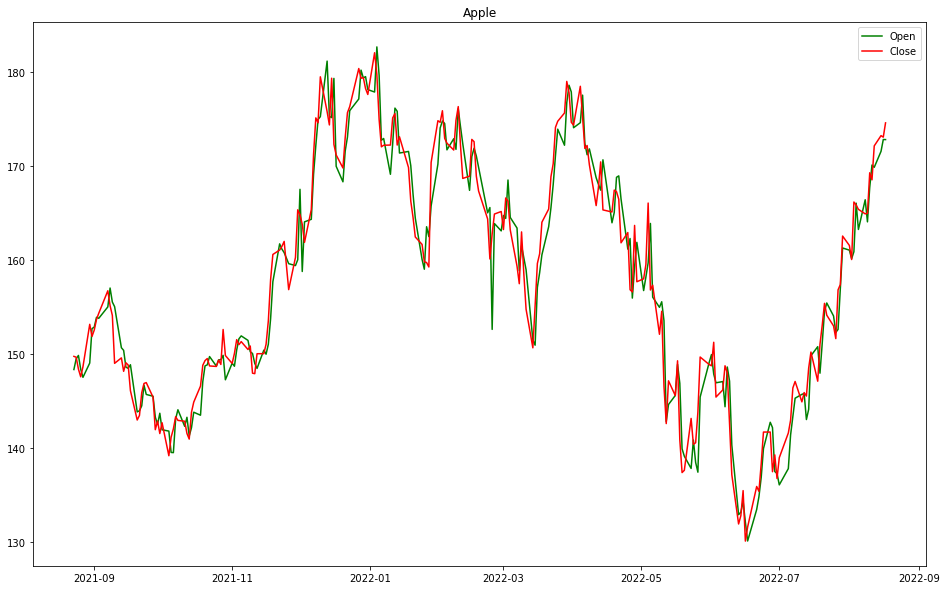

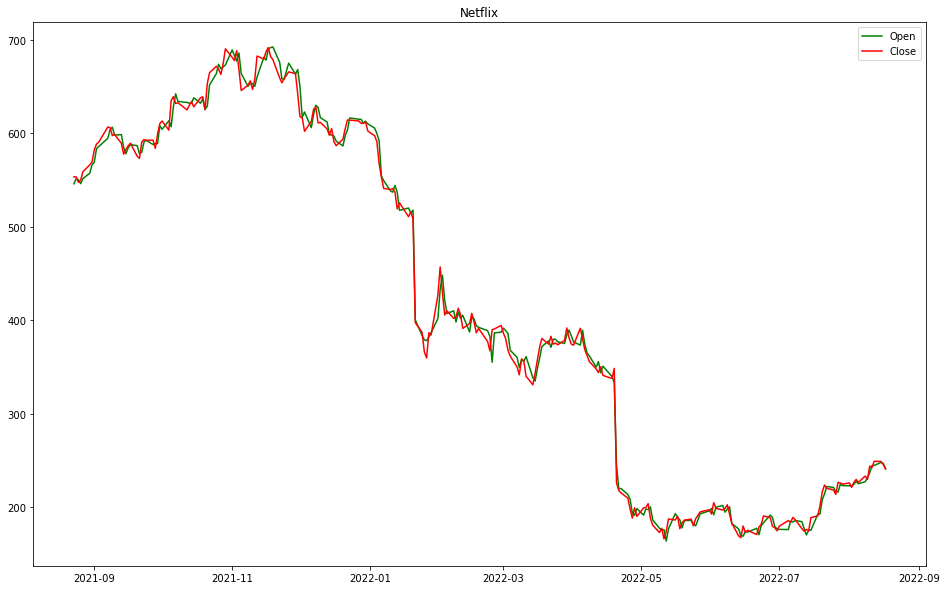

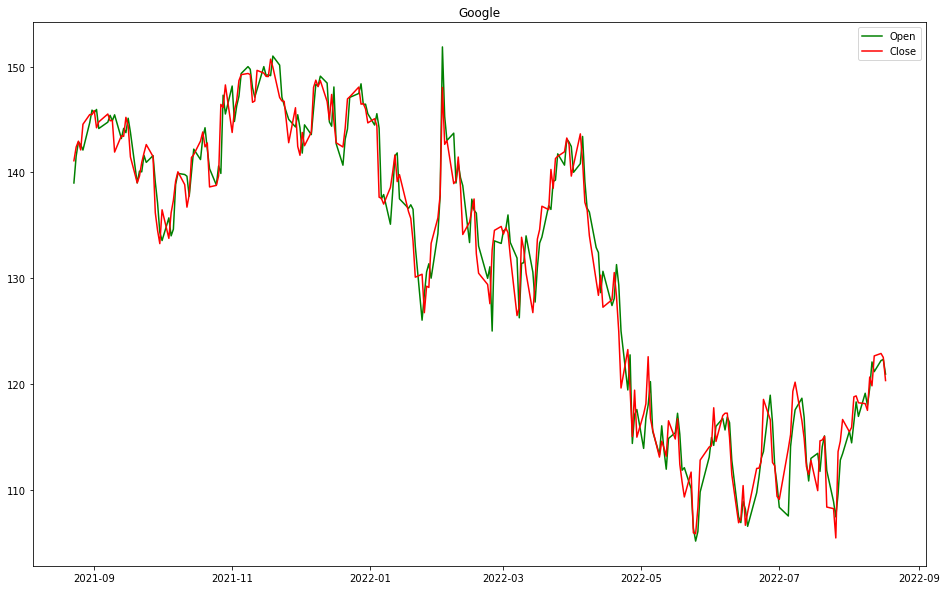

In [184]:
for df in dfs:
    fig, ax = plt.subplots(figsize=(16, 10))
    plt.plot(dfs[df]['Date'], dfs[df]['Open'], label='Open', color='green')
    plt.plot(dfs[df]['Date'], dfs[df]['Close'], label='Close', color='red')
    plt.title(df)
    plt.legend()
    plt.show()

# LSTM

## Train models

In [185]:
df = dfs['Apple'].copy()

In [186]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

In [187]:
X = X.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [188]:
X.shape

(249, 4)

In [189]:
y.shape

(249, 1)

In [190]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

In [191]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(train_X.shape[1], 1)))
model.add(LSTM(64, return_sequences=True))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_56 (LSTM)              (None, 4, 128)            66560     
                                                                 
 lstm_57 (LSTM)              (None, 4, 64)             49408     
                                                                 
 dense_56 (Dense)            (None, 4, 25)             1625      
                                                                 
 dense_57 (Dense)            (None, 4, 1)              26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [192]:
models = {}
tests_X = {}
tests_y = {}

for df in dfs:
    X = dfs[df][['Open', 'High', 'Low', 'Volume']]
    y = dfs[df]['Close']
    X = X.to_numpy()
    y = y.to_numpy()
    y = y.reshape(-1, 1)
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=SEED, shuffle=False)
    
    tests_X[df] = test_X
    tests_y[df] = test_y
    
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(train_X.shape[1], 1)))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dense(25))
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(train_X, train_y, batch_size=1, epochs=30)
    models[df] = model

Epoch 1/30
186/186 [==============================] - 1s 1ms/step - loss: 10834.5820
Epoch 2/30
186/186 [==============================] - 0s 1ms/step - loss: 449.6129
Epoch 3/30
186/186 [==============================] - 0s 1ms/step - loss: 408.2509
Epoch 4/30
186/186 [==============================] - 0s 1ms/step - loss: 413.0990
Epoch 5/30
186/186 [==============================] - 0s 1ms/step - loss: 330.9761
Epoch 6/30
186/186 [==============================] - 0s 1ms/step - loss: 193.7821
Epoch 7/30
186/186 [==============================] - 0s 1ms/step - loss: 146.0213
Epoch 8/30
186/186 [==============================] - 0s 1ms/step - loss: 135.8343
Epoch 9/30
186/186 [==============================] - 0s 1ms/step - loss: 134.4296
Epoch 10/30
186/186 [==============================] - 0s 1ms/step - loss: 118.1479
Epoch 11/30
186/186 [==============================] - 0s 1ms/step - loss: 112.1347
Epoch 12/30
186/186 [==============================] - 0s 1ms/step - loss: 71.1888


## Predictions

2/2 [==============================] - 0s 2ms/step
MAE = 3.137848626999628


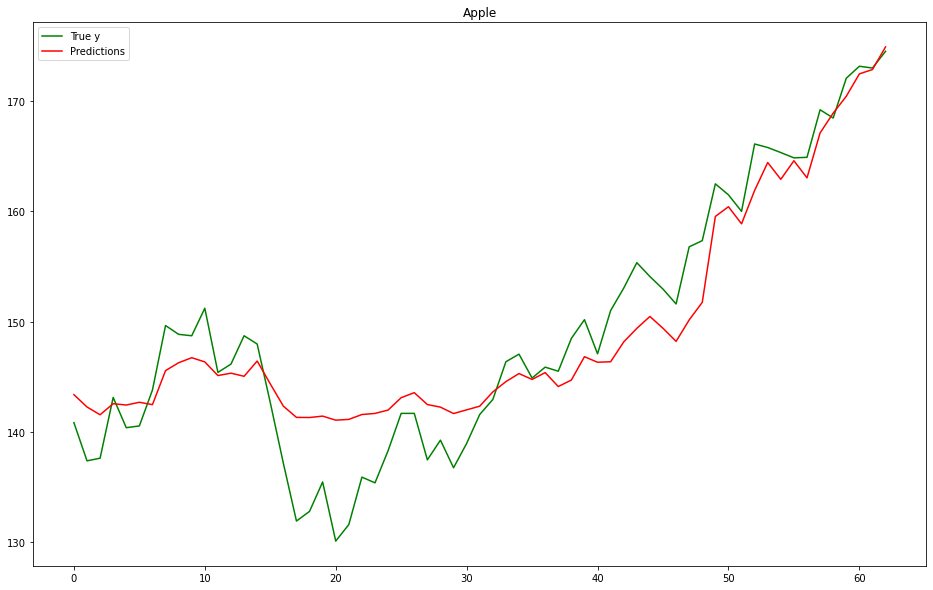

In [193]:
model = 'Apple'

predictions = models[model].predict(tests_X[model])
print('MAE =', mean_absolute_error(tests_y[model], predictions[:, 2]))
fig, ax = plt.subplots(figsize=(16, 10))
plt.plot(tests_y[model], label='True y', color='green')
plt.plot(predictions[:, 2], label='Predictions', color='red')
plt.title(model)
plt.legend()
plt.show()

2/2 [==============================] - 0s 2ms/step
MAE = 8.090448046487476


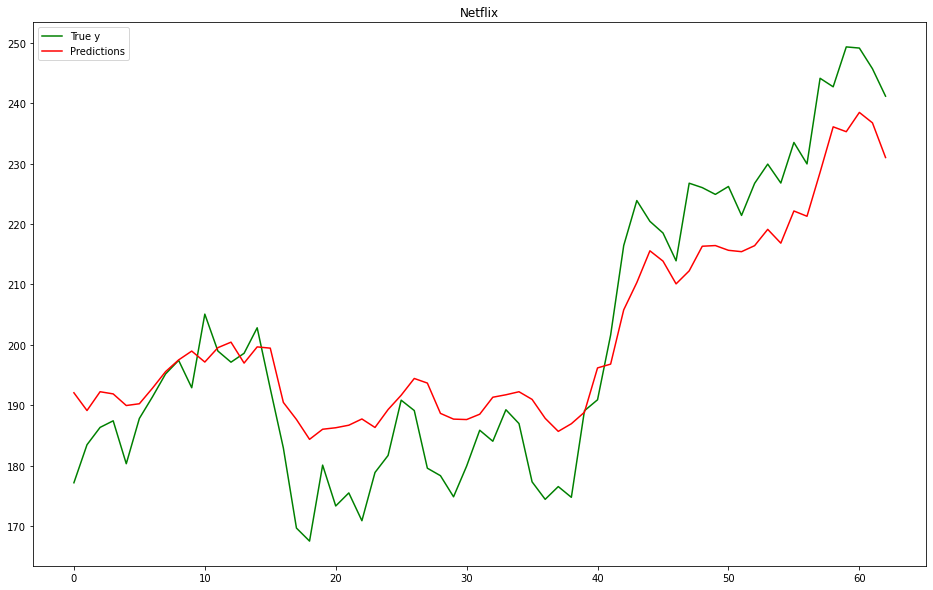

In [194]:
model = 'Netflix'

predictions = models[model].predict(tests_X[model])
print('MAE =', mean_absolute_error(tests_y[model], predictions[:, 1]))
fig, ax = plt.subplots(figsize=(16, 10))
plt.plot(tests_y[model], label='True y', color='green')
plt.plot(predictions[:, 1], label='Predictions', color='red')
plt.title(model)
plt.legend()
plt.show()

2/2 [==============================] - 0s 2ms/step
MAE = 2.8423441326807417


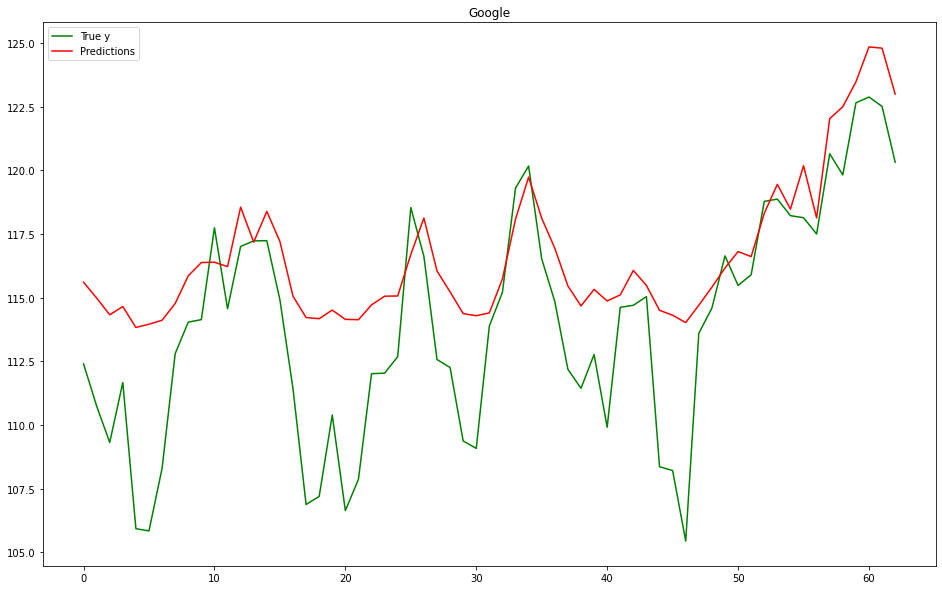

In [195]:
model = 'Google'

predictions = models[model].predict(tests_X[model])
print('MAE =', mean_absolute_error(tests_y[model], predictions[:, 2]))
fig, ax = plt.subplots(figsize=(16, 10))
plt.plot(tests_y[model], label='True y', color='green')
plt.plot(predictions[:, 2], label='Predictions', color='red')
plt.title(model)
plt.legend()
plt.show()